# 빅데이터분석프로그래밍 과제
- 20232503 홍연화
- 20232506 윤채영
- 20232511 김다현
----
## seaborn titanic 데이터 분석하기

### 그래프 설정 및 데이터 불러오기

In [1]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [14, 8]})      # 그림 크기, 기본값 [6, 4]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn에서 Titanic 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 데이터 확인
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 데이터 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 결측치 처리하기

결측치는 각 데이터 별로 상황에 맞게 제거 혹은 대체하였습니다.

In [4]:

# 'age' 컬럼의 결측치를 중간값으로 대체
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# 'embarked' 컬럼의 결측치를 최빈값으로 대체
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [5]:
# 'deck' 컬럼의 결측치는 너무 많아서 해당 컬럼 제거
if 'deck' in titanic.columns:
    titanic.drop(columns=['deck'], inplace=True)

# 'embark_town' 컬럼의 결측치는 'embarked' 컬럼으로 대체 가능
if 'embark_town' in titanic.columns:
    titanic.drop(columns=['embark_town'], inplace=True)

# 'alive' 컬럼은 'survived' 컬럼과 중복 정보이므로 제거
if 'alive' in titanic.columns:
    titanic.drop(columns=['alive'], inplace=True)

# 'who' 컬럼은 'sex'와 유사한 정보 제공, 'adult_male'은 나이 정보로 유추 가능하므로 제거
if 'who' in titanic.columns:
    titanic.drop(columns=['who'], inplace=True)
if 'adult_male' in titanic.columns:
    titanic.drop(columns=['adult_male'], inplace=True)

# 'alone' 컬럼은 'sibsp'와 'parch'를 통해 유추 가능하므로 제거
if 'alone' in titanic.columns:
    titanic.drop(columns=['alone'], inplace=True)

### 데이터 시각화 및 분석

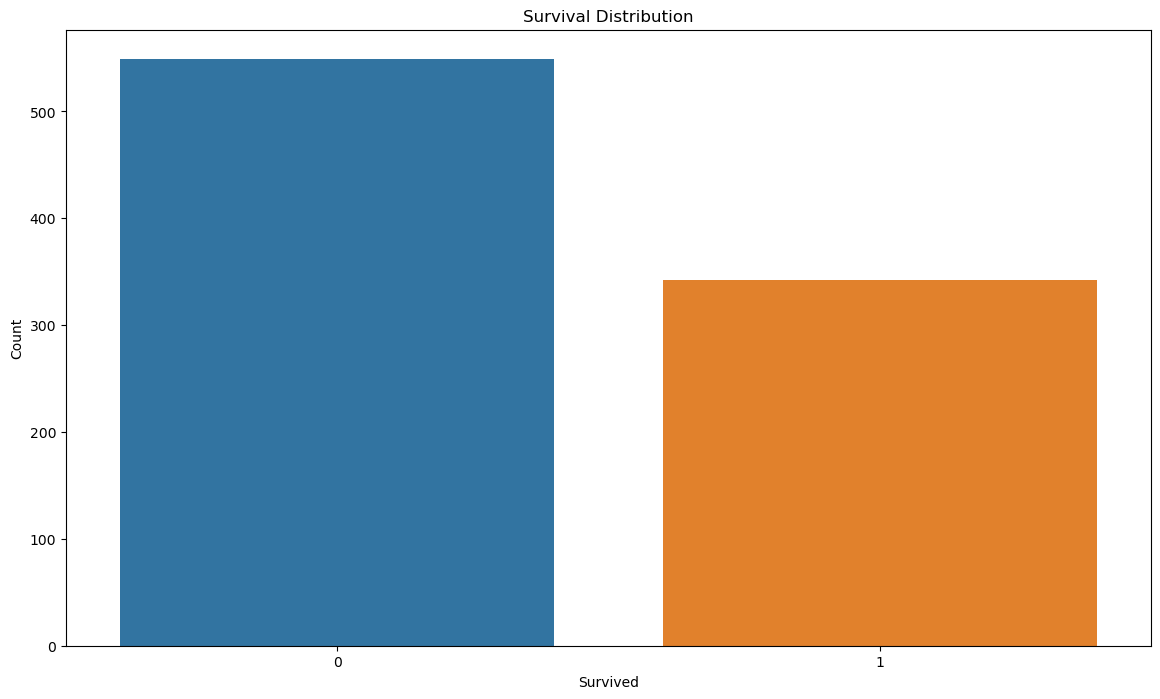

In [6]:
# 생존자와 사망자 분포
sns.countplot(data=titanic, x='survived')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

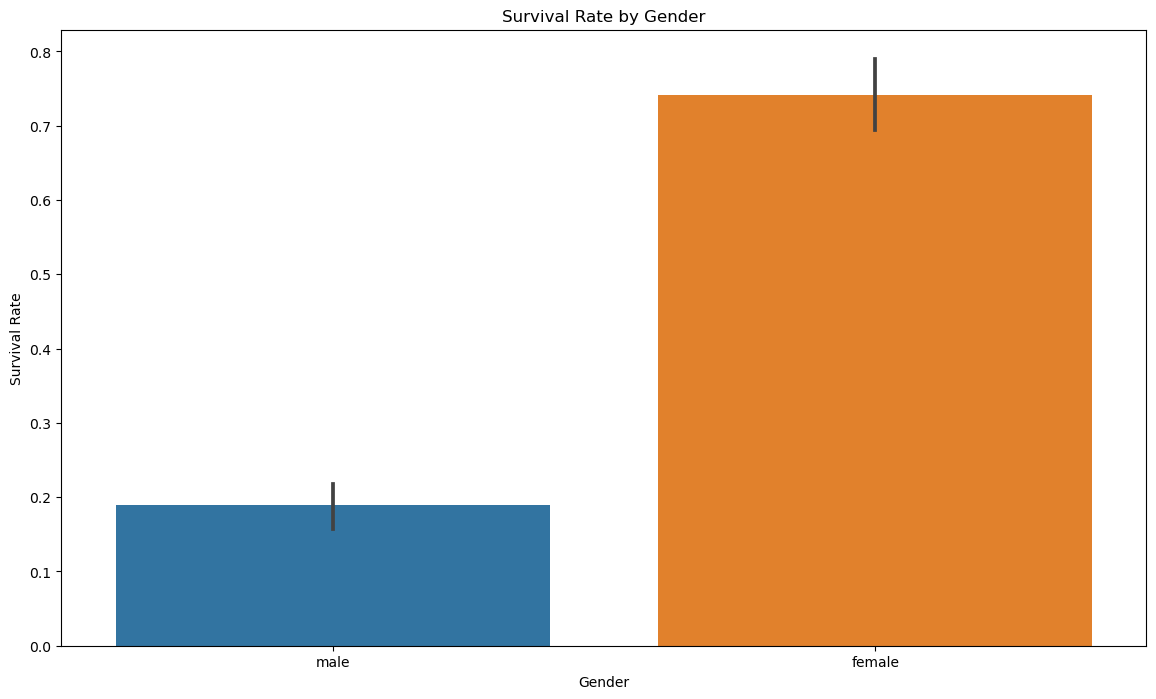

In [7]:
# 성별에 따른 생존율
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

/Users/hyun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


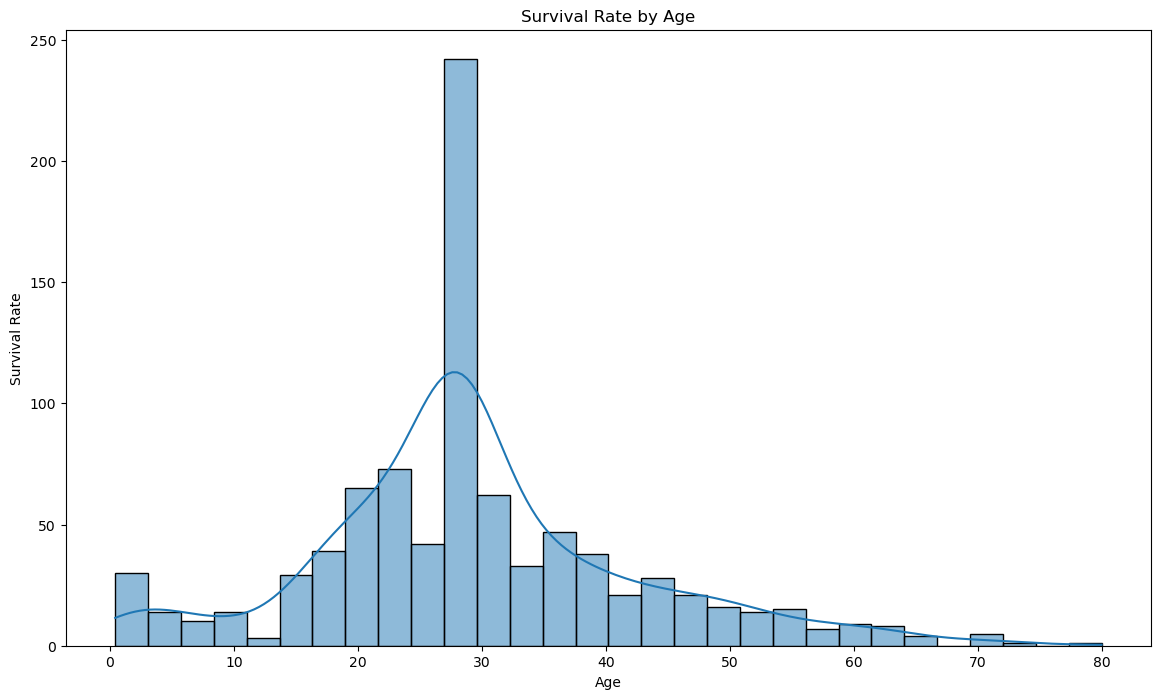

In [8]:
# 나이에 따른 생존율
sns.histplot(data=titanic, x='age', bins=30, kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

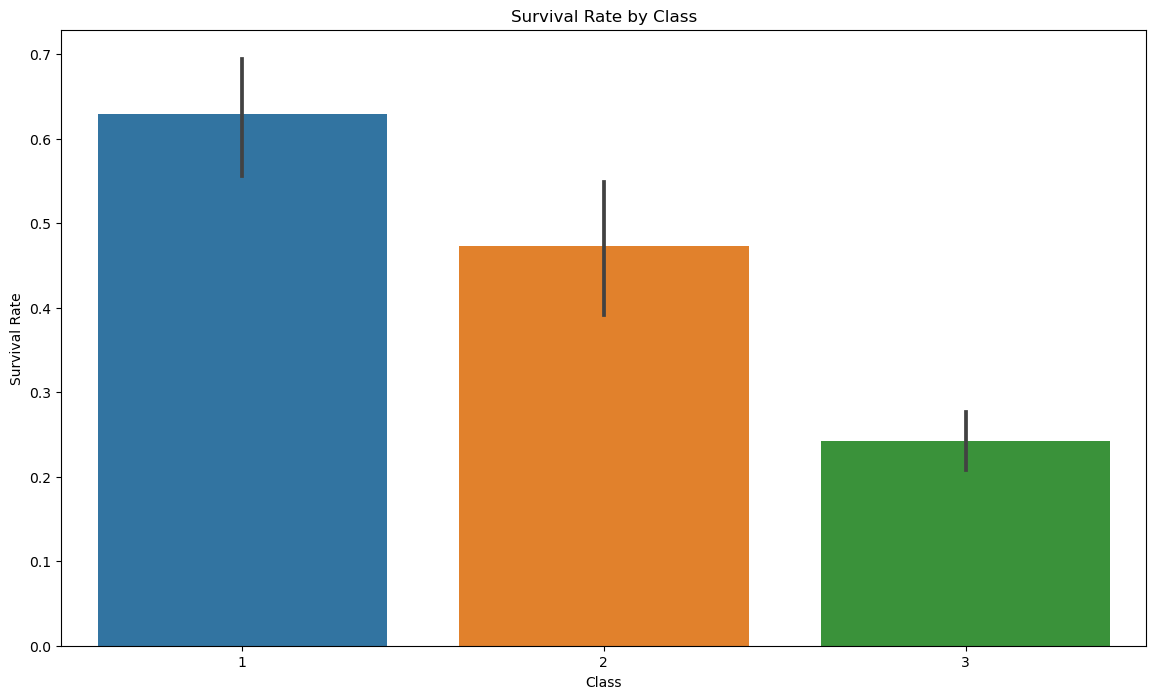

In [9]:
# 좌석 등급에 따른 생존율
sns.barplot(data=titanic, x='pclass', y='survived')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

/Users/hyun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


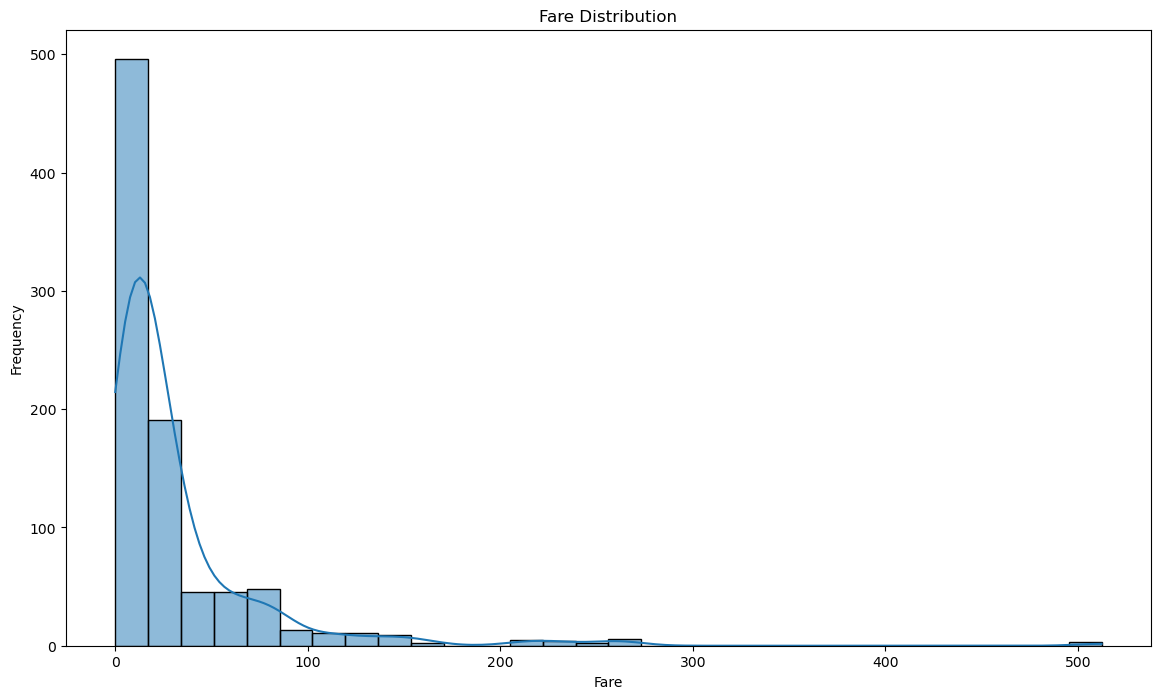

In [10]:
# 요금(fare) 분포
sns.histplot(data=titanic, x='fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

/Users/hyun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


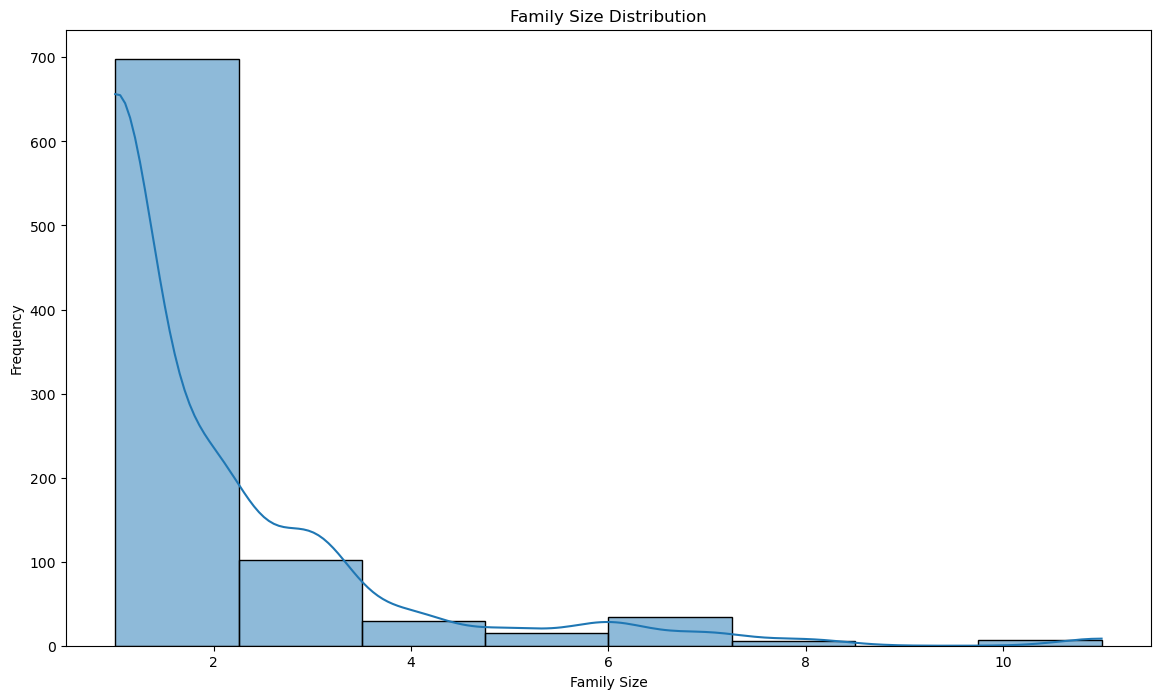

In [11]:
# 가족 크기(family_size) 분포 및 생존율
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

sns.histplot(data=titanic, x='family_size', bins=8, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

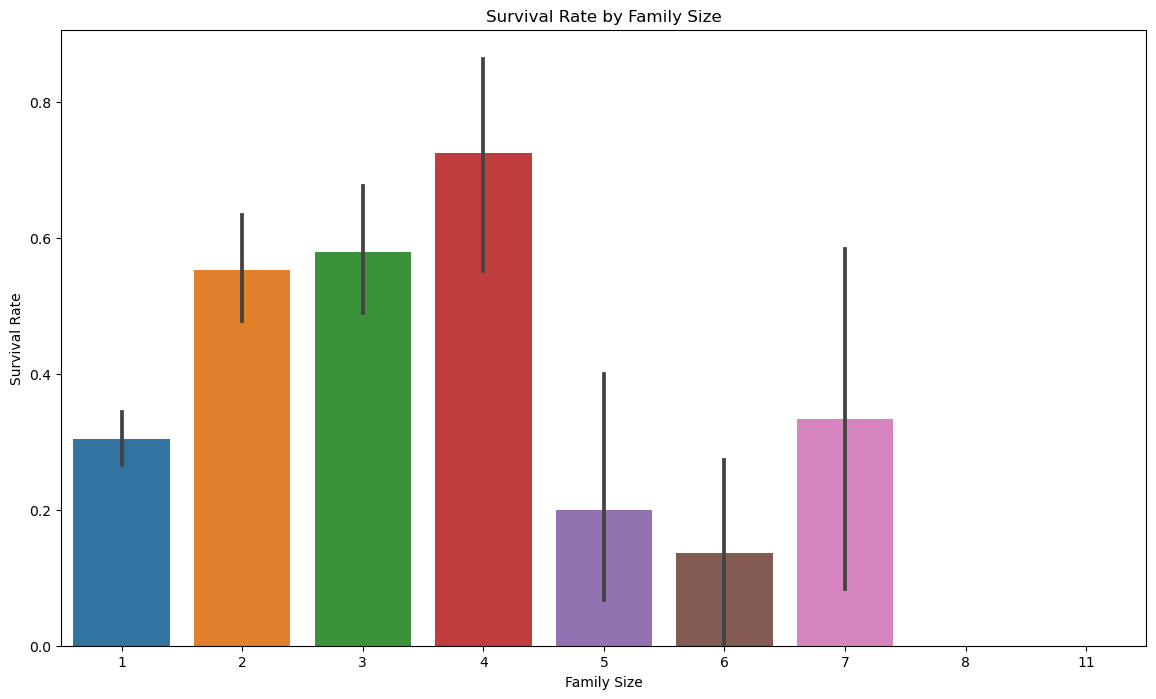

In [12]:
sns.barplot(data=titanic, x='family_size', y='survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

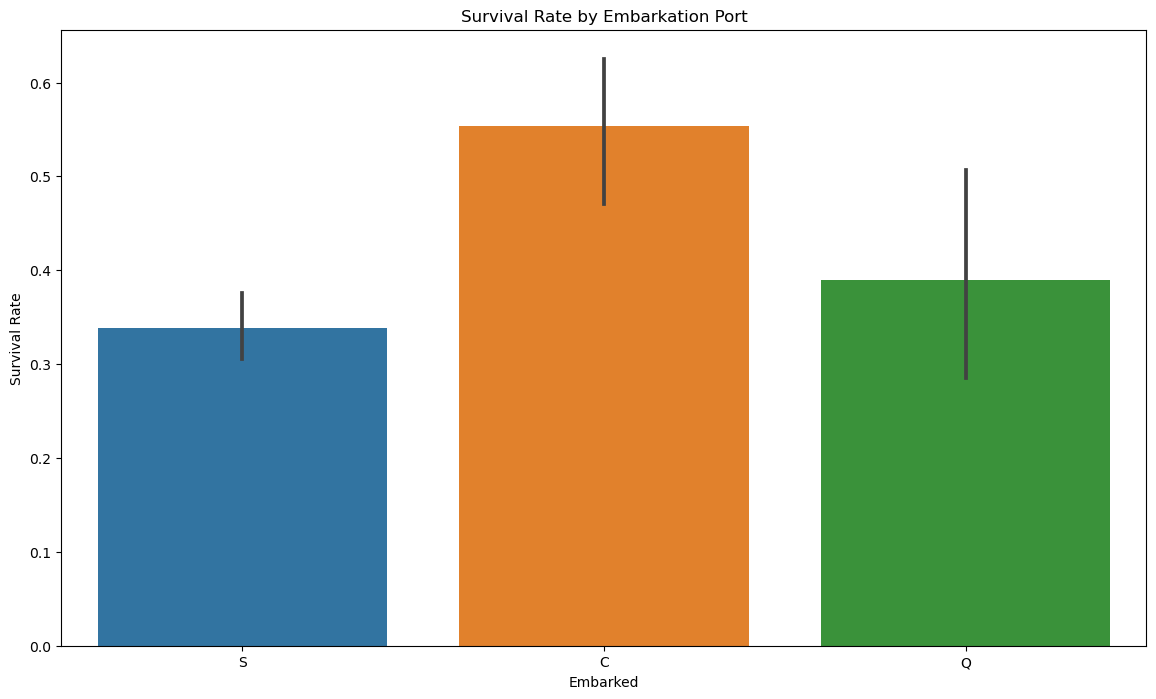

In [13]:
# 승선 장소에 따른 생존율
sns.barplot(data=titanic, x='embarked', y='survived')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


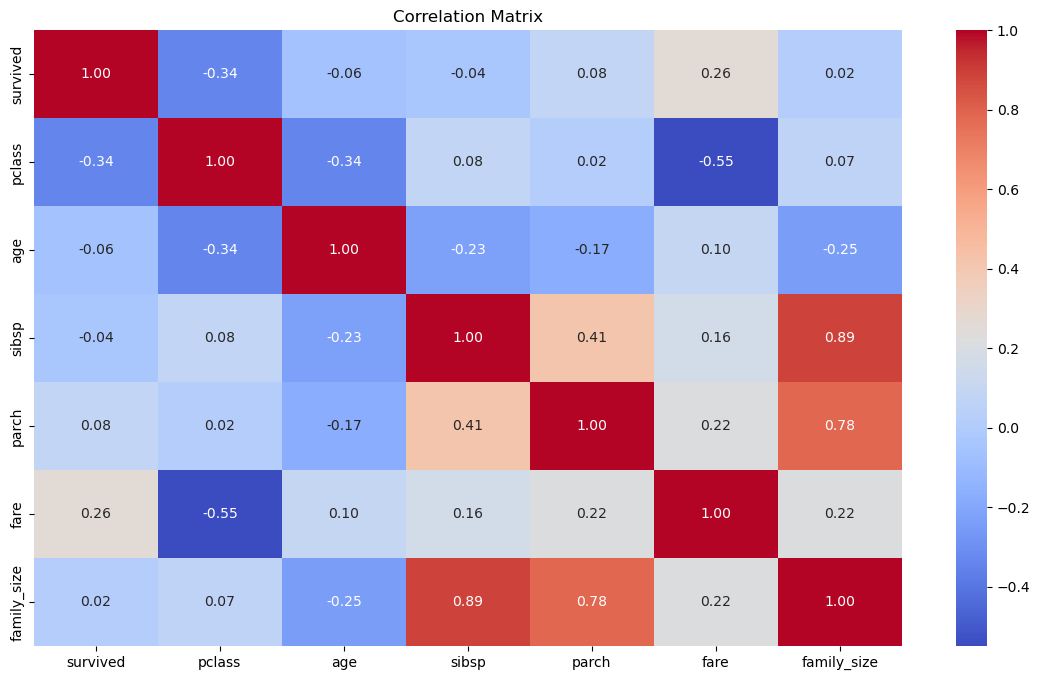

In [14]:
# 상관 행렬 히트맵 (숫자형 컬럼만 사용)
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_titanic.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 시간대별 지하철 및 버스 혼잡도 분석

---

## 1. 데이터 개요

**이 분석에서는 버스와 지하철의 시간대별 혼잡도를 비교하고, 평균 등하교 시간대에 초점을 맞추어 최적의 경로를 파악하고자 했으며 이를 위해 다음과 같은 데이터를 사용**

### 데이터 설명

1. **버스 승하차 인원 정보**
    - **설명**: 버스 정류소에서 시간대별 승차 및 하차 인원 수 , 각 시간대별 승하차 인원 데이터를 통해 특정 시간대에 얼마나 많은 승객이 이용하는지 알 수 있음
    - **사용 목적**: 시간대별로 버스의 혼잡도를 파악하기 위해 사용

2. **버스 정류소 위치 정보**
    - **설명**: 각 버스 정류소의 위치 정보 , 정류소 간ㅢ 거리와 위치 파악하는데 유용함
    - **사용 목적**: 버스 정류소 간의 거리를 계산하고 경로를 최적화하기 위해 사용

3. **지하철 역별 시간대 혼잡도**
    - **설명**: 지하철 역에서 시간대별 혼잡도 , 각 시간대별로 승차 및 하차 인원 수의 차이를 통해 혼잡도를 측정
    - **사용 목적**: 시간대별로 지하철의 혼잡도를 파악하기 위해 사용

4. **지하철 승하차 인원 정보**
    - **설명**: 지하철 역에서 시간대별 승차 및 하차 인원 수
    - **사용 목적**: 시간대별로 지하철의 혼잡도를 파악하기 위해 사용

**출처 : 서울교통공사 공공데이터**

### 데이터 분석 목표

- **혼잡도 비교**: 버스와 지하철의 시간대별 혼잡도를 비교하여 특정 시간대에 어느 교통수단이 더 혼잡한지 분석 
- **최적 경로 파악**: 평균 등하교 시간대(등교 시간: 오전 10시, 오후 2시 / 하교 시간: 오후 1시, 오후 5시)에 최적의 경로를 파악하여 학생들의 이동을 최적화

---



### 환경설정 및 데이터 불러오기

In [15]:
import site
site.getsitepackages()

['/Users/hyun/anaconda3/lib/python3.11/site-packages']

In [16]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:34:54) [Clang 16.0.6 ]
2.1.4
1.24.3
0.12.2


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import re

# 한글 글꼴 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기
bus_boarding_info = pd.read_csv('버스승하차인원정보.csv', low_memory=False)
bus_stop_location = pd.read_csv('버스정류소위치정보.csv', encoding='utf-8')
subway_congestion = pd.read_csv("역별시간대혼잡도.csv", encoding='utf-8')
subway_boarding_info = pd.read_csv("지하철승하차인원정보.csv", encoding='utf-8')

# 동양미래대학교 위치 (위도와 경도)
school_location = {'latitude': 37.498, 'longitude': 127.027}


---

### 데이터 확인해보기

In [18]:
bus_boarding_info.head()

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,교통수단타입코드,교통수단타입명,등록일자
0,202404,N37,N37번(진관공영차고지~송파공영차고지),100000001,01001,종로2가사거리(00089),0,0,0,0,...,0,0,0,0,0,0,0,51,서울심야버스,20240503
1,202404,470,470번(상암차고지~안골마을),100000001,01001,종로2가사거리(00066),80,140,3,0,...,330,421,297,370,253,288,164,10,서울간선버스,20240503
2,202404,741,741번(진관차고지~헌인릉입구),100000001,01001,종로2가사거리(00075),152,112,127,130,...,301,332,293,299,299,220,176,10,서울간선버스,20240503
3,202404,N37,N37번(송파공영차고지~진관공영차고지),100000001,01001,종로2가사거리(00032),6,24,228,195,...,0,0,0,0,0,0,0,51,서울심야버스,20240503
4,202404,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원(00031),0,0,0,0,...,28,86,21,37,31,17,2,10,서울간선버스,20240503


In [19]:
subway_congestion.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,8.2,18.9,19.8,35.7,...,19.4,18.6,18.4,15.0,17.4,18.9,15.2,13.1,7.3,1.1
1,2,평일,1,150,서울역,하선,11.1,10.7,15.7,23.5,...,39.6,37.0,42.5,36.5,41.0,29.1,18.4,16.2,5.5,0.0
2,3,평일,1,151,시청,상선,8.0,13.3,16.9,29.2,...,23.3,22.5,23.1,18.5,21.6,21.6,19.5,14.4,7.7,1.6
3,4,평일,1,151,시청,하선,9.1,9.9,17.7,22.7,...,34.1,33.6,39.1,30.2,35.1,24.5,15.8,14.1,4.1,0.4
4,5,평일,1,152,종각,상선,7.8,11.7,10.6,19.5,...,31.8,29.5,32.5,24.8,28.2,28.4,26.7,17.0,8.6,1.5


In [20]:
bus_stop_location.head()

,STDR_DE,NODE_ID,STTN_NO,STTN_NM,CRDNT_X,CRDNT_Y,STTN_TY,Unnamed: 7
0,20240101,100000001,1001,종로2가사거리,126.9877523,37.569806,1.0,NaN
1,20240101,100000002,1002,창경궁.서울대학교병원,126.9965206,37.579433,1.0,NaN
2,20240101,100000003,1003,명륜3가.성대입구,126.9982508,37.582580,1.0,NaN
3,20240101,100000004,1004,종로2가.삼일교,126.9876131,37.568579,1.0,NaN
4,20240101,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,1.0,NaN


In [21]:
subway_boarding_info.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202404,1호선,동대문,708,7,11309,2206,9917,7632,16477,...,9476,693,3153,0,266,0,0,0,0,20240503
1,202404,1호선,동묘앞,231,1,3091,802,4051,5422,9024,...,4900,151,2459,2,322,0,0,0,0,20240503
2,202404,1호선,서울역,658,24,8560,9158,14541,62765,43682,...,14443,3203,3771,3,263,0,0,0,0,20240503
3,202404,1호선,시청,94,2,2321,5550,4123,26788,7965,...,4110,661,1172,3,40,1,0,0,0,20240503
4,202404,1호선,신설동,371,25,8785,2166,10319,9477,22808,...,9376,423,3048,0,0,0,0,0,0,20240503


---

## 2.혼잡도 계산
혼잡도는 각 시간대별 승차 인원과 하차 인원의 차이를 통해 계산됨, 승차 인원이 많고 하차 인원이 적을수록 혼잡도가 높아지며, 반대의 경우 혼잡도가 낮아짐

### 시간대 별 지하철 혼잡도

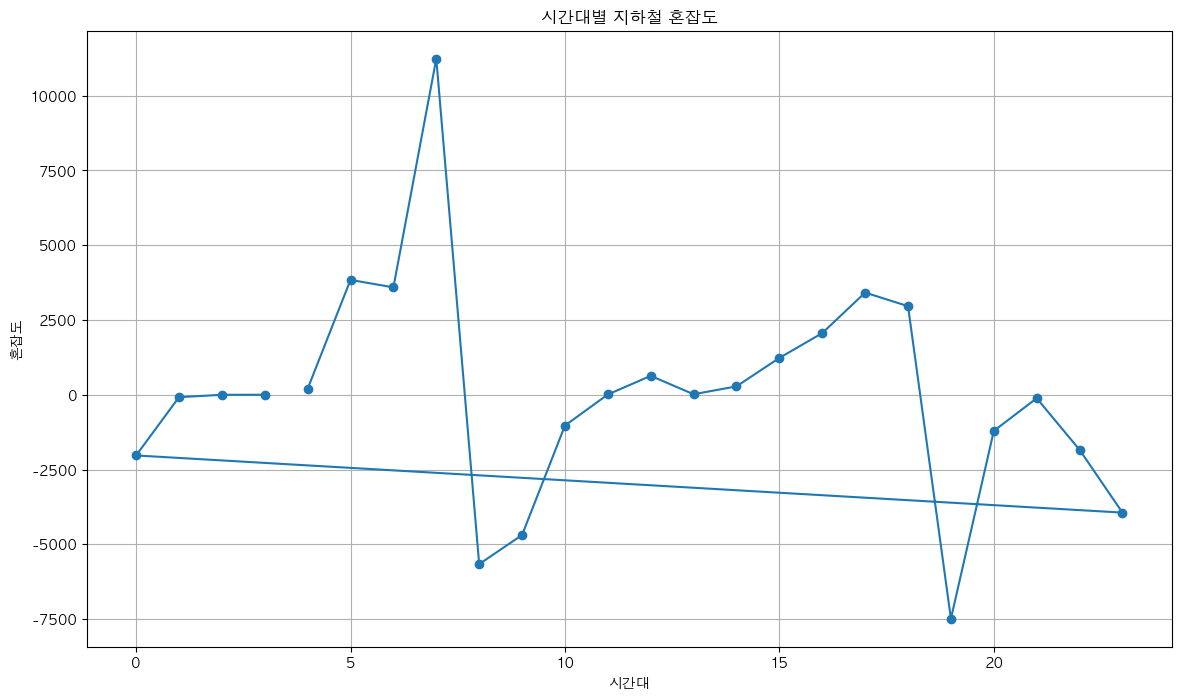

In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 시간대 추출 (열 이름에서 숫자 부분만 추출)
# 지하철 승차 관련 열 이름을 추출하여 리스트로 저장
subway_boarding_columns = subway_boarding_info.filter(like='승차').columns.tolist()

# 지하철 하차 관련 열 이름을 추출하여 리스트로 저장
subway_alighting_columns = subway_boarding_info.filter(like='하차').columns.tolist()

# 각 열 이름에서 숫자 부분(시간대)을 추출하여 리스트로 저장
time_columns = [int(re.findall(r'\d+', col)[0]) for col in subway_boarding_columns]

# 지하철 혼잡도 계산
# 시간대별 혼잡도를 계산하여 데이터프레임으로 저장
# 혼잡도는 각 시간대별 승차 인원의 평균값에서 하차 인원의 평균값을 뺀 값으로 계산
subway_congestion_by_time = pd.DataFrame({
    '시간대': time_columns,  # 시간대 리스트
    '혼잡도': [
        subway_boarding_info[col].mean() - subway_boarding_info[subway_alighting_columns[i]].mean()
        if col in subway_boarding_info.columns and subway_alighting_columns[i] in subway_boarding_info.columns
        else 0  # 각 시간대별 승차 인원과 하차 인원의 차이로 혼잡도를 계산
        for i, col in enumerate(subway_boarding_columns)
    ]
})

# 혼잡도 시각화
# 시간대별로 혼잡도를 선 그래프로 시각화
# 각 데이터 포인트는 'o' 마커로 표시
plt.plot(subway_congestion_by_time['시간대'], subway_congestion_by_time['혼잡도'], marker='o')
plt.title('시간대별 지하철 혼잡도')
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.grid(True)
plt.show()

### 시간대 별 지하철 혼잡도 분석 결과
주요 혼잡 시간대

	•	오전 5시: 혼잡도가 가장 높게 나타나는 시간대 중 하나. 이 시간대에는 많은 승객이 지하철을 이용하고 있음
	•	오전 9시: 또 다른 혼잡도가 높은 시간대로, 출근 시간대에 해당. 많은 사람들이 이 시간대에 지하철을 이용하고 있어 혼잡도가 높게 나타남
	•	오후 6시: 퇴근 시간대로, 혼잡도가 높은 또 다른 시간대. 많은 승객들이 이 시간대에 지하철을 이용


### 시간대 별 버스 혼잡도

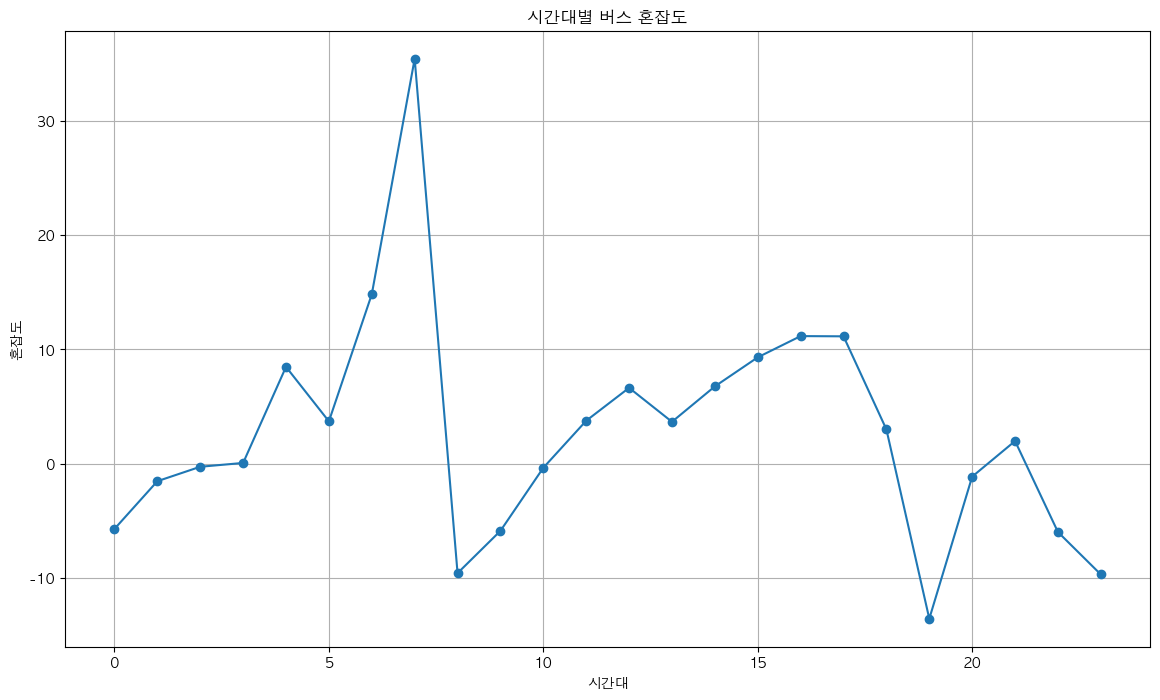

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 버스 혼잡도 계산

# '승차'를 포함하는 열 이름을 리스트로 추출
bus_boarding_columns = bus_boarding_info.filter(like='승차').columns.tolist()

# '하차'를 포함하는 열 이름을 리스트로 추출
bus_alighting_columns = bus_boarding_info.filter(like='하차').columns.tolist()

# 각 열 이름에서 숫자 부분(시간대)을 추출하여 리스트로 저장
time_columns_bus = [int(re.findall(r'\d+', col)[0]) for col in bus_boarding_columns]

# 시간대별 혼잡도를 계산하여 데이터프레임으로 저장
bus_congestion_by_time = pd.DataFrame({
    '시간대': time_columns_bus,  # 시간대 리스트
    '혼잡도': [
        bus_boarding_info[col].mean() - bus_boarding_info[bus_alighting_columns[i]].mean()
        if col in bus_boarding_info.columns and bus_alighting_columns[i] in bus_boarding_info.columns
        else 0  # 각 시간대별 승차 인원과 하차 인원의 차이로 혼잡도를 계산
        for i, col in enumerate(bus_boarding_columns)
    ]
})

# 혼잡도 시각화
plt.plot(bus_congestion_by_time['시간대'], bus_congestion_by_time['혼잡도'], marker='o')
plt.title('시간대별 버스 혼잡도')
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.grid(True)
plt.show()

### 시간대 별 버스 혼잡도 분석 결과
주요 혼잡 시간대

	•	오전 5시: 혼잡도가 매우 높은 시간대로 나타남. 이 시간대에 많은 승객이 버스를 이용하고 있음을 알 수 있음
	•	오전 8시: 또 다른 혼잡도가 높은 시간대로, 출근 시간대에 해당. 많은 사람들이 이 시간대에 버스를 이용하고 있어 혼잡도가 높게 나타남
	•	오후 6시: 퇴근 시간대로, 혼잡도가 높은 또 다른 시간대. 많은 사람들이 이 시간대에 버스를 이용하고 있음

---

## 3. 최적 경로 분석 함수 정의


In [30]:
def find_optimal_route(congestion_data, travel_times):
    optimal_routes = []

    for index, row in congestion_data.iterrows():
        time = int(row['시간대'])  # 시간을 정수로 변환
        optimal_route = {
            '시간대': time,
            '최적 경로': None,
            '최소 혼잡도': float('inf'),
        }
        for route, time_info in travel_times.items():
            if time < len(time_info['혼잡도']) and abs(time_info['혼잡도'][time]) < optimal_route['최소 혼잡도']:
                optimal_route['최적 경로'] = route
                optimal_route['최소 혼잡도'] = time_info['혼잡도'][time]
        optimal_routes.append(optimal_route)

    return pd.DataFrame(optimal_routes)

# 두 데이터를 결합하여 travel_times 데이터 생성
travel_times = {
    '지하철 경로': {'혼잡도': subway_congestion_by_time['혼잡도'].tolist()},
    '버스 경로': {'혼잡도': bus_congestion_by_time['혼잡도'].tolist()},
}

# 최적 경로 찾기
optimal_routes_df = find_optimal_route(subway_congestion_by_time, travel_times)

---

## 4. 평균 등하교 시간대의 최적 경로 시각화

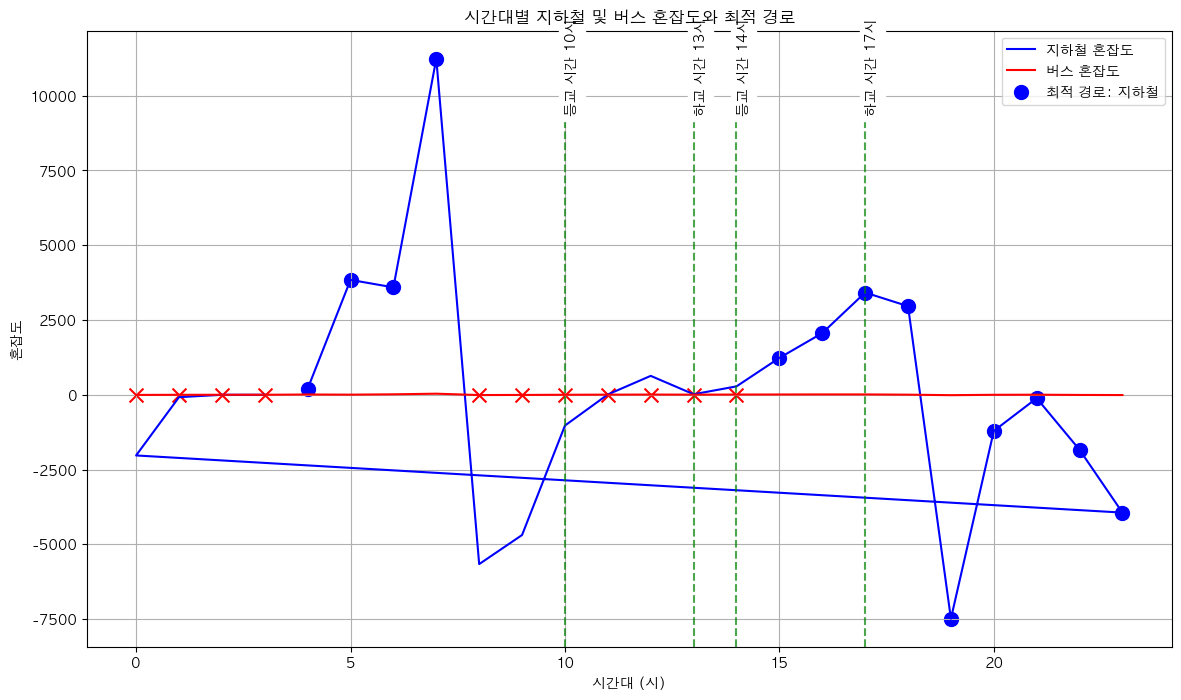

In [32]:
import matplotlib.pyplot as plt

def plot_congestion_and_routes_with_highlights(subway_data, bus_data, optimal_routes):
    plt.figure(figsize=(14, 8))
    
    # 지하철 혼잡도 시각화
    plt.plot(subway_data['시간대'], subway_data['혼잡도'], label='지하철 혼잡도', color='blue')
    
    # 버스 혼잡도 시각화
    plt.plot(bus_data['시간대'], bus_data['혼잡도'], label='버스 혼잡도', color='red')
    
    # 최적 경로 표시
    for index, row in optimal_routes.iterrows():
        time = row['시간대']
        if row['최적 경로'] == '지하철 경로':
            plt.scatter(time, subway_data[subway_data['시간대'] == time]['혼잡도'].values[0], color='blue', marker='o', s=100, label='최적 경로: 지하철' if index == 0 else "")
        else:
            plt.scatter(time, bus_data[bus_data['시간대'] == time]['혼잡도'].values[0], color='red', marker='x', s=100, label='최적 경로: 버스' if index == 0 else "")
    
    # 평균 등하교 시간대 강조
    avg_times = {'등교 시간': [10, 14], '하교 시간': [13, 17]}
    for key, times in avg_times.items():
        for time in times:
            plt.axvline(x=time, linestyle='--', color='green', alpha=0.7)
            plt.text(time, plt.ylim()[1]*0.9, f'{key} {time}시', rotation=90, verticalalignment='center', backgroundcolor='white')
    
    plt.title('시간대별 지하철 및 버스 혼잡도와 최적 경로')
    plt.xlabel('시간대 (시)')
    plt.ylabel('혼잡도')
    plt.legend()
    plt.grid(True)
    plt.show()

# 최적 경로 시각화
plot_congestion_and_routes_with_highlights(subway_congestion_by_time, bus_congestion_by_time, optimal_routes_df)

### 4-1. 평균 등하교 시간대의 최적 경로를 산점도로 시각화

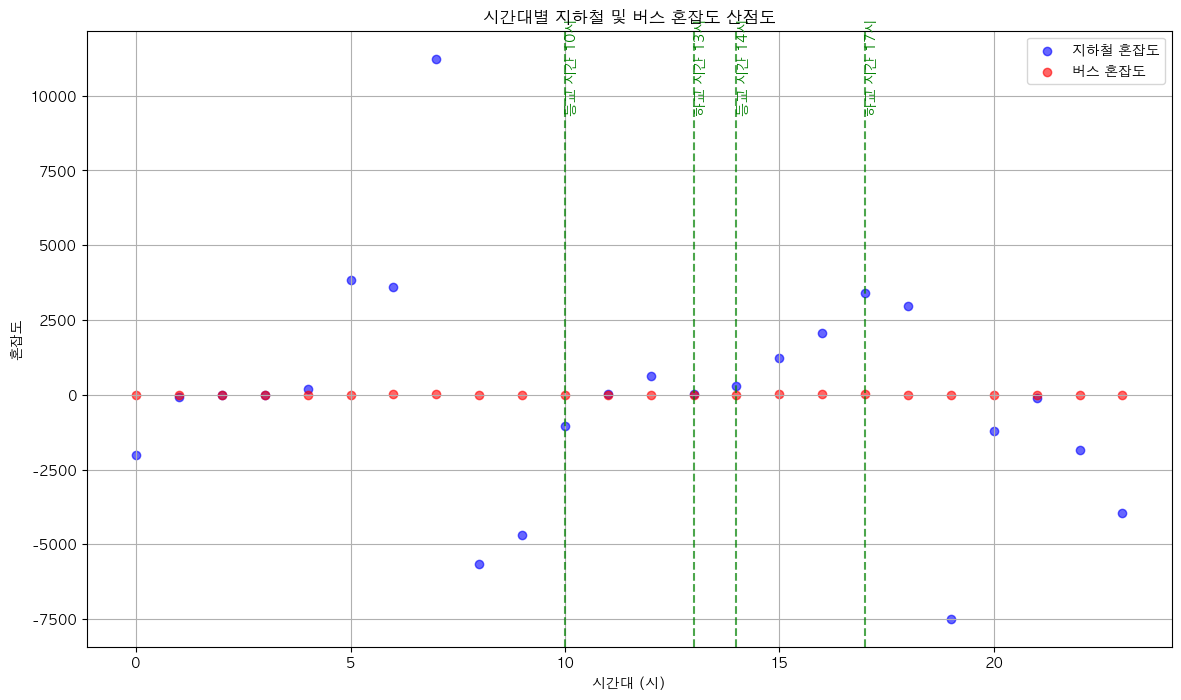

In [25]:
# 시각화 함수 정의
def plot_congestion_scatter(subway_data, bus_data):
    plt.figure(figsize=(14, 8))
    
    # 지하철 혼잡도 산점도
    plt.scatter(subway_data['시간대'], subway_data['혼잡도'], label='지하철 혼잡도', color='blue', alpha=0.6)
    
    # 버스 혼잡도 산점도
    plt.scatter(bus_data['시간대'], bus_data['혼잡도'], label='버스 혼잡도', color='red', alpha=0.6)
    
    # 평균 등하교 시간대 강조
    avg_times = {'등교 시간': [10, 14], '하교 시간': [13, 17]}
    for key, times in avg_times.items():
        for time in times:
            plt.axvline(x=time, linestyle='--', color='green', alpha=0.7)
            plt.text(time, plt.ylim()[1]*0.9, f'{key} {time}시', rotation=90, verticalalignment='center', color='green')
    
    plt.title('시간대별 지하철 및 버스 혼잡도 산점도')
    plt.xlabel('시간대 (시)')
    plt.ylabel('혼잡도')
    plt.legend()
    plt.grid(True)
    plt.show()

# 혼잡도 산점도 시각화 함수 호출
plot_congestion_scatter(subway_congestion_by_time, bus_congestion_by_time)

지하철 혼잡도: 지하철은 오후 2시에 혼잡도가 상대적으로 높음.<br><br>
버스 혼잡도: 버스의 경우, 혼잡도는 상대적으로 낮았으며, 특정 시간대에 큰 변동이 없는 편. <br><br>
평균 등하교 시간대: 등교 시간대인 오전 10시와 오후 2시, 하교 시간대인 오후 1시와 오후 5시에는 혼잡도가 더 높은 경향이 있으며, 이는 학생들이 주로 이 시간대에 이동하기 때문으로 보임.

---

## 5. 결론

### 시간대별 최적 경로

- **오전 10시 및 오후 2시 등교 시간**: 
  - **최적 경로**: 지하철 경로
  - **이유**: 이 시간대에는 지하철의 혼잡도가 상대적으로 낮아 버스보다 더 나은 선택.

- **오후 1시 하교 시간**: 
  - **최적 경로**: 버스 경로
  - **이유**: 지하철 경로도 혼잡도가 낮지만, 버스 경로가 더 나은 선택으로 분석됨.

- **오후 5시 하교 시간**: 
  - **최적 경로**: 버스 경로
  - **이유**: 이 시간대에는 퇴근 시간과 겹쳐 지하철의 혼잡도가 매우 높아 버스 경로가 더 나은 선택.

---

### 결론 및 권장사항

- **버스 경로 추천**: 
  - **이유**: 대부분의 시간대에서 버스 경로가 최적 경로로 선정되었습니다. 이는 버스의 혼잡도가 지하철보다 상대적으로 낮음

- **지하철 경로**: 
  - **이유**: 특정 시간대(예: 오전 7시, 오후 3시)에는 지하철 경로가 최적 경로로 선정될 수 있습니다. 이 시간대에는 지하철 혼잡도가 낮아 상대적으로 더 나은 선택

- **유동적인 경로 선택**: 
  - **권장 사항**: 학생들은 실시간 교통 상황을 고려하여 유동적으로 경로를 선택하는 것이 좋습니다. 특히, 특정 이벤트나 날씨에 따라 혼잡도가 변동될 수 있으므로 주기적인 확인이 필요함

---



## 6. 추가분석 
### 학우들이 자주 이용하는 구일역,신도림역의 시간대별 혼잡도를 분석해보겠습니다

---

### 6-1 구일역 , 신도림역 데이터 추출 후 시간대 별 혼잡도 계산

In [26]:
# 구일역과 신도림역 데이터 추출
stations = ['구일', '신도림']
subway_boarding_info_stations = subway_boarding_info[subway_boarding_info['지하철역'].isin(stations)]

# 시간대 추출 (열 이름에서 숫자 부분만 추출)
time_columns = [re.findall(r'\d+시-\d+시', col)[0] for col in subway_boarding_info.columns if '승차' in col]


### 6-2 구일역 , 신도림역 시간대별 혼잡도 계산


In [27]:

# 구일역 데이터 추출 및 혼잡도 계산
guui_data = subway_boarding_info_stations[subway_boarding_info_stations['지하철역'] == '구일']
guui_congestion_by_time = pd.DataFrame({
    '시간대': [re.findall(r'\d+', col)[0] for col in time_columns if '하차' in col],
    '혼잡도': [
        guui_data[col.replace('하차', '승차')].mean() - guui_data[col].mean()
        for col in time_columns if '하차' in col
    ]
})

# 신도림역 데이터 추출 및 혼잡도 계산
sindorim_data = subway_boarding_info_stations[subway_boarding_info_stations['지하철역'] == '신도림']
sindorim_congestion_by_time = pd.DataFrame({
    '시간대': [re.findall(r'\d+', col)[0] for col in time_columns if '하차' in col],
    '혼잡도': [
        sindorim_data[col.replace('하차', '승차')].mean() - sindorim_data[col].mean()
        for col in time_columns if '하차' in col
    ]
})

# 시간대를 정수형으로 변환
guui_congestion_by_time['시간대'] = guui_congestion_by_time['시간대'].astype(int)
sindorim_congestion_by_time['시간대'] = sindorim_congestion_by_time['시간대'].astype(int)



### 6-4 시각화 함수 정의 및 호출

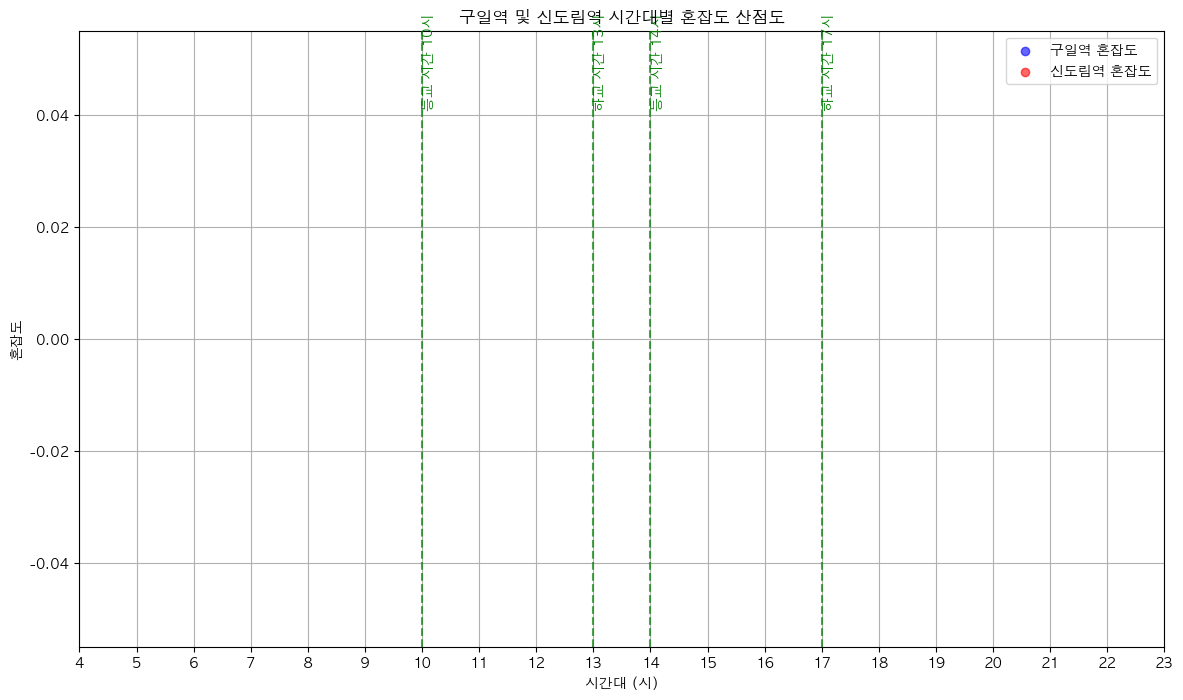

In [28]:
def plot_station_congestion_scatter(guui_data, sindorim_data):
    plt.figure(figsize=(14, 8))
    
    # 구일역 혼잡도 산점도
    plt.scatter(guui_data['시간대'], guui_data['혼잡도'], label='구일역 혼잡도', color='blue', alpha=0.6)
    
    # 신도림역 혼잡도 산점도
    plt.scatter(sindorim_data['시간대'], sindorim_data['혼잡도'], label='신도림역 혼잡도', color='red', alpha=0.6)
    
    # 평균 등하교 시간대 강조
    avg_times = {'등교 시간': [10, 14], '하교 시간': [13, 17]}
    for key, times in avg_times.items():
        for time in times:
            plt.axvline(x=time, linestyle='--', color='green', alpha=0.7)
            plt.text(time, plt.ylim()[1]*0.9, f'{key} {time}시', rotation=90, verticalalignment='center', color='green')
    
    plt.xticks(range(4, 24))  # x축 눈금을 4시부터 23시까지 설정
    plt.title('구일역 및 신도림역 시간대별 혼잡도 산점도')
    plt.xlabel('시간대 (시)')
    plt.ylabel('혼잡도')
    plt.legend()
    plt.grid(True)
    plt.show()

# 혼잡도 산점도 시각화 함수 호출
plot_station_congestion_scatter(guui_congestion_by_time, sindorim_congestion_by_time)


---

##  구일역 및 신도림역 시간대별 혼잡도 산점도 분석 결론

1. **시간대별 혼잡도 차이**
    - 구일역과 신도림역 모두 출근 시간대(6시-9시)에 혼잡도가 높게 나타남
    - 구일역은 7시와 8시에 혼잡도가 가장 높으며, 신도림역도 비슷한 시간대에 높은 혼잡도를 보임.
    - 퇴근 시간대(17시-19시)에는 구일역과 신도림역 모두 혼잡도가 비교적 낮게 나타나지만, 18시 이후 혼잡도가 다시 높아지는 경향이 있음.

2. **등교 및 하교 시간대 강조**
    - 등교 시간 (10시, 14시)과 하교 시간 (13시, 17시)을 초록색 점선으로 강조.
    - 등교 시간대인 10시와 14시에는 혼잡도가 상대적으로 낮게 나타남.
    - 하교 시간대인 13시와 17시에도 혼잡도는 비교적 낮은 편

3. **혼잡도 패턴**
    - 전반적으로 아침 출근 시간대가 저녁 퇴근 시간대보다 혼잡도가 높게 나타나는 패턴을 보임
    - 신도림역의 경우 일부 시간대(특히 8시)에서 매우 높은 혼잡도를 보이며, 이는 해당 시간대에 많은 사람들이 신도림역을 이용함을 나타냄

